<h4>Studying the Reuters Corpus</h4>

In [1]:
import nltk
from nltk.corpus import reuters

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd

<hr>
<br>
<h4>How many categories are there in the Reuters Corpus ?</h4>

In [3]:
print('There are ' + str(len(reuters.categories())) + ' categories in the Reuters Corpus')

There are 90 categories in the Reuters Corpus


<h4>Creating a list of the documents across te different categories </h4>

In [4]:
category_doc = [(category, id)
                for category in reuters.categories()
                for id in reuters.fileids(categories=category)]

What kind of variable is category_doc ?

In [5]:
print(type(category_doc))
print(category_doc[0])

<class 'list'>
('acq', 'test/14843')


Reading the first 5 lines of the first article 

In [6]:
from nltk.tokenize import sent_tokenize
sent = sent_tokenize(reuters.raw('test/14843'))
for i in np.arange(0,5):
    print(i,sent[i])

0 SUMITOMO BANK AIMS AT QUICK RECOVERY FROM MERGER
  Sumitomo Bank Ltd &lt;SUMI.T> is certain to
  lose its status as Japan's most profitable bank as a result of
  its merger with the Heiwa Sogo Bank, financial analysts said.
1 Osaka-based Sumitomo, with desposits of around 23.9
  trillion yen, merged with Heiwa Sogo, a small, struggling bank
  with an estimated 1.29 billion dlrs in unrecoverable loans, in
  October.
2 But despite the link-up, Sumitomo President Koh Komatsu
  told Reuters he is confident his bank can quickly regain its
  position.
3 "We'll be back in position in first place within three
  years," Komatsu said in an interview.
4 He said that while the merger will initially reduce
  Sumitomo's profitability and efficiency, it will vastly expand
  Sumitomo's branch network in the Tokyo metropolitan area where
  it has been relatively weak.


In [13]:
reuters.categories()[0:5]

['acq', 'alum', 'barley', 'bop', 'carcass']

<hr>
<br>
The list category_doc can be transformed in a collection of tuples where each tuple corresponds to a particular category using the function <b> ConditionalFreqDist</b><br>
The function returns a dictionary with as <b>key</b>, the name of the category and as <b>item</b> the names of the articles belonging to this category

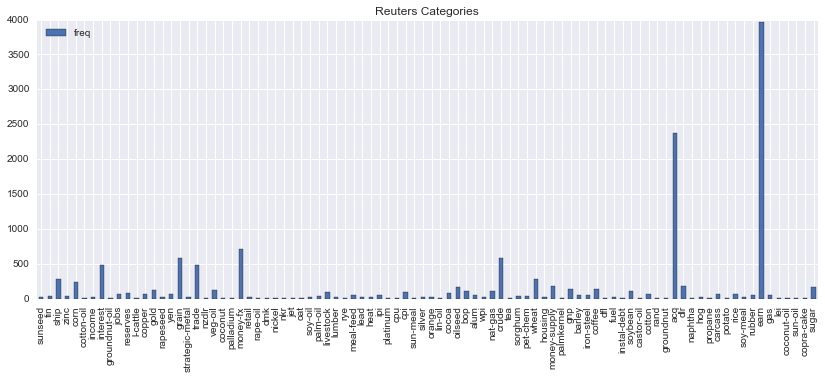

In [8]:
cfd = nltk.ConditionalFreqDist(category_doc)
cat_name = []
cat_freq = []
for k in cfd.keys():
    cat_name.append(k)
    cat_freq.append(len(cfd[k]))

    
# put the result in a dataframe    
cat_name =  np.array(cat_name)
cat_freq =  np.array(cat_freq)

df = pd.DataFrame(cat_freq,index=cat_name)
df.columns = ['freq']
df.plot(title='Reuters Categories',kind='bar',figsize=(14,5));


<h4> What is the most important category ? </h4>

In [9]:
df_top = df.sort_values(by='freq',ascending=False).head()


In [10]:
df_top

,freq
earn,3964
acq,2369
money-fx,717
grain,582
crude,578


<h4>When does one observe most of the merger & aquisition news ?</h4>

In [11]:
Days = dict()
Days['monday']=0
Days['tuesday']=0
Days['wednesday']=0
Days['thursday']=0
Days['friday']=0
Days['saturday']=0
Days['sunday']=0

for doc in reuters.fileids(categories='acq'):
    # reading all the words that are lower case and 
    # insert them in an array
    v=np.array([v.lower() for v in reuters.words(doc)])
    for d in Days.keys():
        idx = v == d
        Days[d] += sum(idx)

In [12]:
df = pd.DataFrame.from_dict(Days,orient='index')
df.columns = ['nbr']
df.sort_values(by='nbr',ascending=False,inplace=True)
df

,nbr
friday,64
monday,33
wednesday,14
tuesday,13
thursday,12
sunday,11
saturday,1
